# Introduction to Data Science Flow

In this session we want to familiarize ourselves with how to go from a dataset and a question to a model that can answer that question using machine learning; specifically Keras. This is squarely in the realm of data science, but as you will see these are techniques that you will want to add into your workflow.

There are five basic steps that we will want to cover:
  1. Initial data exploration
    - visulizations, scatter plots, some dimensionality reduction, etc
  2. Data clean up
    - Organizing the data based on what it will be used for
  3. Model building
    - Making a predictive model based on the data if supervised learning
  4. Model testing
    - Does it actually work? does it generalize? does it need to?
  5. Repeat from step 1 until satisfied

For this work we'll be taking a look at the Fisher Iris dataset. As we go through the notebook I'll point out how to use numpy, matplotlib and keras to accomplish the goals we've set out.

I will _not_ be providing the dataset here. Instead I encourage you to find the Fisher Iris dataset in the wild.

The goal for today is to make a model that can use the features from the Fisher Iris dataset, to predict the species of the iris.

## 1) Initial Data Exploration

Once you find the dataset name it data.tsv. Make sure it is a tab separated file with the following schema

Dataset Order (int, unique), Sepal Length (float), Sepal Width (float), Petal Length (float), Petal Width (float), Class (string)

Next we'll have to load in the file to do some work with it. In python this is easy to do with the _open_ built-in function. It takes as arguments the name of the file and the mode: reading, writing, appending.

Instead of manually closing the file, we will use the _with_ keyword to make a context manager that will automaticall close the file when we're done.

In [7]:
with open('data.tsv') as f:
    lines = f.readlines()

Now that we have all the lines in a list, we can print a line to see what we have:

In [15]:
lines[100]

'101 \t6.3 \t3.3 \t6.0 \t2.5 \tI. virginica\n'

Now we should clean it up. We won't need the dataset order, so we can throw that away, and we should make our four features into numbers so that we can start plotting. Having the species as a string is fine, but it would be more useful to assing a number to each species.

To do all of these things, I recommend taking a look at the string method _split_. We should be able to split each string along the '\t', so that each line will then be a list. Then we should turn all the features into floats using the _float_ built-in function. This should work if the string looks like a number. Lastly we should turn the strings into integers.

You should implement that yourself.

In [9]:
data = []
for line in lines:
    # Split the string
    parts = None
    
    # Go through each of the parts and turn them into floats
    sepal_lenth = None
    sepal_width = None
    petal_length = None
    petal_width = None
    
    # Make the species name into an integer
    species = None
    
    # Append everything into the data list
    data.append( [sepal_lenth, sepal_width, petal_length, petal_width, species] )

NumPy arrays are incredible useful data types (though Pandas data-frames are becoming more and more popular). We will turn the data into a numpy array for easy indexing. Before that we need to import the library into workspace, and give it the short name np

In [2]:
import numpy as np
data = np.array(data)

Now we are ready to do some visulizations. For this we'll use matplotlib's pyplot interface. If you've ever used MATLAB then this will look familiar. Again we need to import this first, and give it a short name (for convenience). When in a jupyter notebook, we also need to insert the magic command _%matplotlib inline_, to make sure that our plots show up in line in our notebook. This substitutes the show command that we would normally have to do.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Now we can move on to do some numpy indexing. We index numpy arrays with square brackets []. If the array has more than one dimension, then we can use a comma to index each dimension. What's really nice is that we can use the colon : to fetch all the elements of that dimension.

So for example _array[:,0]_, will fetch all the elements in the first dimension, and then grab the first element from that list. _array[4,:]_ will fetch all the elements of the second dimension, and then grab the fifth element of the first dimension.

Anyways, we want to plot the data, to see what we're dealing with. We'll be doing that using a scatter plot. We want to choose the color of the dot depending on the class.

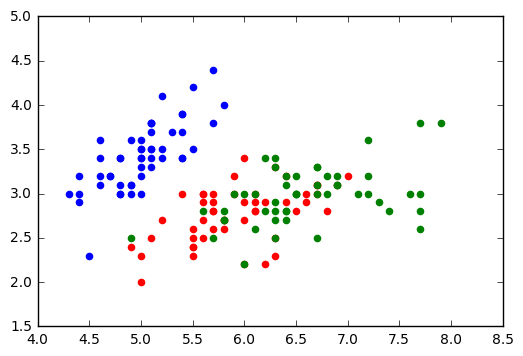

In [4]:
for i in range(data.shape[0]):
    datum = data[i,:]
    if datum[-1]==0:
        color = 'blue'
    elif datum[-1]==1:
        color = 'red'
    elif datum[-1]==2:
        color = 'green'
    else:
        print('There is somehting wrong with your class labels')
        continue
    plt.scatter(datum[0], datum[1], color=color)

You can grab the code above and try to do plots using the other feature combinations. Alternatively you can come up with much shorter code to make the same plots (one way is with numpy fancy mask indexing, or realizing that the data is already orgnized by class).

#### A small aside on how to use jupyter notebooks
You can press _esc_ to enter command mode. In command mode you can do lots in neat things, like copying and pasting entire cells (move to it with the arrows keys, press c, and then v), enter markdown mode (press m) [incidentally, this is how I write these cells], delete celss (press d twice), and many others. The help button has a keyboard shortcuts menu with more.

#### End aside

Now that we have a general idea of what the data looks like, we can start forming some intuition. It is very clear that one of the classes is linearly separable, while the other might not even be non-linearly separable. This is good to know, it sets expectations for what might be possible.

# 2) Data clean up

We've already done some pre-processing to get the data into a plotable format, but depending on what kind of model we want to use we might need to do some more clean up.
Since we're planning on using an MLP, we will want to make the data array X, and the label array Y. These need to have shapes of (number of examples, number of features) for X, and (number of examples, 3) for Y.

After we've done that, we'll actually want to _normalize_ or _whiten_ the data. Normalization is any procedure to constraint the values of the data into a regime that is good for our network. Generally people choose to transform the data so that the smallest value for each feature is 0 and the highest is 1.

Whitening, is a similar idea, but instead, we're looking to have the data have a mean of 0 and a standard deviation of 1 (ie be the stereotypical normal distribution). We can do this using numpy to find the mean and standard deviation of each feature, and then subtracting the mean and dividing by the standard deviation.

For now I'd recommend going with normalization.

For the labels, we actually want to make this into a one-hot encoding. This means that if we have class 0 we want to have the label [1, 0, 0], class 1 label [0, 1, 0] and class 2 label [0, 0, 1]. Keras has functions that can do this for us, but I'll show a naive way of doing the same.

### 2.1) Make the data (X) and label (Y) arrays 

In [5]:
X = data[:,0:4]
Y = data[:,4]

print('The shape of X is {}'.format(X.shape))
print('The shape of Y is {}'.format(Y.shape))

The shape of X is (150, 4)
The shape of Y is (150,)


Notice that the shape is not quite correct for the label array. We can fix this by using the reshape method. So long as the product of the shape dimensions is equal, you can have reshape the array. For example:

z is shape (10,4)
you can reshape it to:
  - (2,5,4)
  - (10, 2, 2)
  - (20,2)
  - (1,10,4)

but not to:
  - (5,16)
  - (3,5,4)
  - (1,1,41)
  
This is just useful to know.

You should always, double check that the array in the new form still has a shape that makes sense to you!
If you understand how C-arrays work, then the re-shaping makes some sense, but always always double check, don't assume!

In [6]:
ys = []
for label in Y:
    if label==0:
        ys.append([1,0,0])
    elif label==1:
        ys.append([0,1,0])
    elif label==2:
        ys.append([0,0,1])
    else:
        print('Somthing is wrong with your labels!')
        continue

Y = np.array(ys)
print('The shape of Y is {}'.format(Y.shape))

The shape of Y is (150, 3)


### 2.2) Normalization

Now we need to normalize our features. For each feature we should find the min, and the max. Then subtract the min from all and then divide the max (if it's not clear why this is true, then pull a sheet of paper and prove it to yourself.)

We can do this for all the features at once! We can ask numpy to find the min and max for each feature, and then using NumPy's broadcasting rules subtract and divide for all.

In [7]:
minimum = np.min(X, axis=0) # We want the first axis (axis=0) to collapse the first dimension
print('The feature-wise min {}'.format(minimum))

The feature-wise min [4.3 2.  1.  0.1]


In [8]:
maximum = np.max(X, axis=0) # We want the first axis (axis=0) to collapse the first dimension
print('The feature-wise max {}'.format(maximum))

The feature-wise max [7.9 4.4 6.9 2.5]


Now we can use broadcasting. When numpy sees you doing math with arrays that are not the same shape, it tries to expand the smaller array to be the same shape as the larger array. It will do this by copying the smaller array over and over. In our case we have the data array with shape (150,4) and the minimum array with shape (4,). Numpy will broadcast the minimum array to (150,4), so we can actually do the arithmetic.

Broadcasting is really useful to save yourself dozens of lines of code, but it sucks when it happens and you don't know! You should always have a mental map of how big your arrays are, and what shapes they have so that you are not surprised!

In [9]:
X = (X - minimum)/maximum

# 3) Model Building

Now we need to start building our predictive model. To do that we will be using Keras. Again we have to import it, but this time we will be importing only the pieces we need. Keras has really good documentation, that I strongly recommened you read at their site [Keras.io](https://www.Keras.io).

In [10]:
from keras.models import Sequential
from keras.layers import Dense

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [36]:
model = Sequential()  # Make the scaffold for a sequential model (go from one layer straight into the next)

# Add a dense layer (typical NN layer) with ten neurons, and a sigmoid activation function
# For the first layer of each keras model you need to specify what shape the data examples will have
model.add( Dense(5, input_shape=(4,), activation='sigmoid') )

# We can add as many layers as we want using the same syntax.
# After the first layer Keras can auto cast the shapes from one layer to the next
model.add( Dense(5, activation='sigmoid') )

# For our last layer we need to have Dense layer have as many outputs as we need
model.add( Dense(3, activation='softmax') )

We are choosing the softmax activation to normalize the output at the end (the sum of the last array will always be one). This is preparation of using cross entropy as our loss function to force our model to learn a probabily distribution.

After we have our model, we need to _compile_ it. Keras will actually write C++ code for us and compile it. This is usually a 100 fold speed up from raw Python. If you have a GPU and installed the gpu version of tensorflow as your Keras backend you can get an extra 10 to a 100 fold speed up as well.

We have to tell Keras what loss function we will want to minimize and also want optimization algorithm to use. For now we will use the default categorical crossentropy and the stochastic gradient descent. You can always tweak the defaults yourself, or even make your own. We will also ask Keras to keep track of an extra metric: the accuracy. This won't be used for training but it will give us a good sense of how our model is doing.

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

Now that we have a compiled model we need to train it. To do so we need to provide it data. Keras makes it easy to do this by using the _fit_ method. It is also good practice to have a testing set. This is a set of data that will not be used in the training of the model, but that we will use to see how well the model generalizes. Keras also makes it easy by letting us supply our own testing data, or asking the fit method to split our data into a training and testing set.

In [38]:
hist=model.fit(X,Y, validation_split=0.1, epochs=200, batch_size=1)

Train on 135 samples, validate on 15 samples
Epoch 1/200
135/135 [==============================] - 1s 4ms/step - loss: 1.1063 - acc: 0.3704 - val_loss: 1.2232 - val_acc: 0.0000e+00
Epoch 2/200
135/135 [==============================] - 0s 2ms/step - loss: 1.0857 - acc: 0.3704 - val_loss: 1.2924 - val_acc: 0.0000e+00
Epoch 3/200
135/135 [=====================

The trained _fit_ method returns to us a history object with a summary of what happened throughout the training period. We will use this object in the next step.

# 4) Model Testing

Now that we have a trained model we will usually want to look at the training curves: the loss as a function of the epoch.

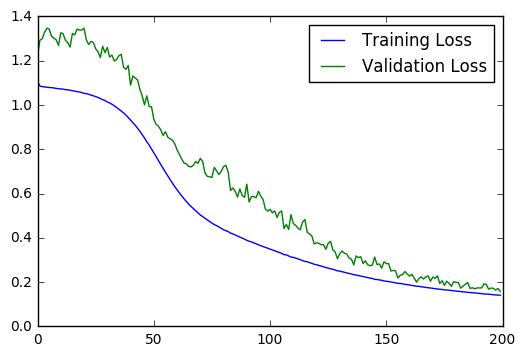

In [41]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend();

With some luck you should see a nice easy decline in the loss. The validation (testing) loss should stay above the training loss; the model is minimizing the training loss, the validation loss going down is a side effect of this.

If you let your model train for long enough you might also start to see overfitting, if your model is large enough.

A good way to do testing is to use K-fold cross validation. You divide your data set into K equal parts, and then grab the first part and make it your testing set, and train on the other K-1 parts. You then record whatever testing metric you want to keep track of (generally the accuracy). Then you go back and pick the second of the K parts to be the testing and re-train a brand new (unoptimized weights) model with the K-1 parts, record the metric. You repeat until you've picked each of the K parts to be the testing set once.

What this will do is simulate how well the model: optimizes (since you'll have to optimize K times), and generalizes (since the training and testing data are always changing.)

A common K to pick is 10, ie 10-fold cross validation.

An important detail is that you want the testing set to replicate the same distribution of labels as the training set. This is called stratefied K-fold cross validation. If your data has 50:50 split between labels, then should your training set. So it's not enough to pick random splits

You should implement a 5-fold cross validation. Don't worry about it being stratefied for now.

# 5) Repeat

So now we've done all this work... but did it answer our original question? For this data set it should be fairly easy to construct something that generalizes okay-ish to our testing set, but maybe we want to push higher accuracy? At this point we might want to go back to step 1 and make new plots if something else has ocurred to us. Or maybe we will want to clea up the data differently (maybe whiten it this time? how big of an impact will that make?). What if we add more hidden layers? or less? More neurons or less neurons? Should we add regularization? And then obviously we need to rigorously test all this to make sure it is making sense.

Play around!